In [1]:
!pip install gym torch

  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
pip install numpy==1.23.5


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 74.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.1.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 whic

In [1]:
!pip install matplotlib

# Hyperparameter Tuning for CartPole DQN
Experimenting with learning rate, epsilon-greedy, and discount factor to boost the DQN agent’s performance!

## Hyperparameter Experiments
Testing learning rate, epsilon-greedy, and discount factor. Plotting rewards to compare.

**Experiments**:
1. Baseline: learning_rate=0.0005, epsilon_decay=0.995, gamma=0.99
2. Fast Learning: learning_rate=0.001, epsilon_decay=0.999, gamma=0.99
3. Long-Term Focus: learning_rate=0.0005, epsilon_decay=0.995, gamma=0.999


Running Baseline...
Episode 1, Reward: 12.0
Episode 2, Reward: 58.0
Episode 3, Reward: 15.0
Episode 4, Reward: 19.0
Episode 5, Reward: 25.0
Episode 6, Reward: 20.0
Episode 7, Reward: 28.0
Episode 8, Reward: 11.0
Episode 9, Reward: 12.0
Episode 10, Reward: 51.0
Episode 11, Reward: 25.0
Episode 12, Reward: 17.0
Episode 13, Reward: 59.0
Episode 14, Reward: 13.0
Episode 15, Reward: 19.0
Episode 16, Reward: 16.0
Episode 17, Reward: 32.0
Episode 18, Reward: 17.0
Episode 19, Reward: 16.0
Episode 20, Reward: 23.0
Episode 21, Reward: 19.0
Episode 22, Reward: 24.0
Episode 23, Reward: 11.0
Episode 24, Reward: 32.0
Episode 25, Reward: 10.0
Episode 26, Reward: 9.0
Episode 27, Reward: 27.0
Episode 28, Reward: 13.0
Episode 29, Reward: 16.0
Episode 30, Reward: 11.0
Episode 31, Reward: 10.0
Episode 32, Reward: 14.0
Episode 33, Reward: 15.0
Episode 34, Reward: 14.0
Episode 35, Reward: 15.0
Episode 36, Reward: 12.0
Episode 37, Reward: 10.0
Episode 38, Reward: 10.0
Episode 39, Reward: 16.0
Episode 40, Re

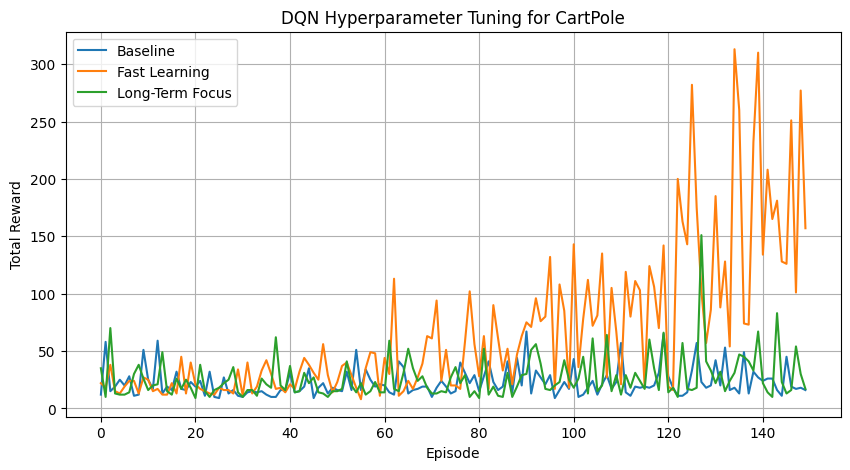

In [5]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque
import numpy as np
import matplotlib.pyplot as plt

# Function to train DQN with given hyperparameters
def train_dqn(learning_rate, epsilon_decay, gamma, episodes=150):
    env = gym.make('CartPole-v1')
    state_size = env.observation_space.shape[0]  # 4
    action_size = env.action_space.n  # 2
    memory = deque(maxlen=2000)

    # DQN Neural Network
    class DQN(nn.Module):
        def __init__(self):
            super(DQN, self).__init__()
            self.fc1 = nn.Linear(state_size, 24)
            self.fc2 = nn.Linear(24, 24)
            self.fc3 = nn.Linear(24, action_size)
        def forward(self, x):
            x = torch.relu(self.fc1(x))
            x = torch.relu(self.fc2(x))
            return self.fc3(x)

    # Initialize model
    model = DQN()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    epsilon = 1.0
    epsilon_min = 0.01
    batch_size = 32
    rewards = []

    # Training loop
    for episode in range(episodes):
        state = env.reset()
        state = torch.FloatTensor(state).unsqueeze(0)
        total_reward = 0
        done = False

        while not done:
            if random.random() < epsilon:
                action = env.action_space.sample()
            else:
                with torch.no_grad():
                    q_values = model(state)
                    action = q_values.argmax().item()

            next_state, reward, done, _ = env.step(action)
            next_state = torch.FloatTensor(next_state).unsqueeze(0)
            total_reward += reward

            memory.append((state, action, reward, next_state, done))
            state = next_state

            if len(memory) > batch_size:
                batch = random.sample(memory, batch_size)
                states, actions, rewards_batch, next_states, dones = zip(*batch)

                states = torch.cat(states)
                actions = torch.LongTensor(actions)
                rewards_batch = torch.FloatTensor(rewards_batch)
                next_states = torch.cat(next_states)
                dones = torch.FloatTensor(dones)

                q_values = model(states).gather(1, actions.unsqueeze(1)).squeeze(1)
                next_q_values = model(next_states).max(1)[0]
                targets = rewards_batch + gamma * next_q_values * (1 - dones)

                loss = criterion(q_values, targets)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        rewards.append(total_reward)
        print(f"Episode {episode+1}, Reward: {total_reward}")

    env.close()
    return rewards

# Run experiments
experiments = [
    {"name": "Baseline", "lr": 0.0005, "eps_decay": 0.995, "gamma": 0.99},
    {"name": "Fast Learning", "lr": 0.002, "eps_decay": 0.990, "gamma": 0.99},
    {"name": "Long-Term Focus", "lr": 0.0005, "eps_decay": 0.995, "gamma": 0.999}
]

all_rewards = []
for exp in experiments:
    print(f"\nRunning {exp['name']}...")
    rewards = train_dqn(exp["lr"], exp["eps_decay"], exp["gamma"])
    all_rewards.append((exp["name"], rewards))

# Plot all experiments
plt.figure(figsize=(10, 5))
for name, rewards in all_rewards:
    plt.plot(rewards, label=name)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('DQN Hyperparameter Tuning for CartPole')
plt.legend()
plt.grid(True)
plt.savefig('hyperparameter_rewards.png')
plt.show()